# Random Forest

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import csv

In [4]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'
df = pd.read_csv(open(cur_path+'/T1.csv','rU'), encoding='utf-8')

In [26]:
df= df[df.Flight_Status==1]
df = df[df.Cancelled==0]
df = df[df.DepDelayMinutes != 0]

In [27]:
df.shape

(1624749, 26)

In [7]:
df.columns

Index(['FlightNum', 'Year', 'Day', 'Month', 'Week', 'Origin', 'Dest',
       'UniqueCarrier', 'Cancelled', 'DepTime', 'CRSArrTime', 'CRSDepTime',
       'DepDel15', 'CRSElapsedTime', 'DepDelayMinutes', 'OriginCityName',
       'DestCityName', 'Distance', 'Flight_Status', 'OriginVisibility',
       'OriginWind', 'OriginPrecip', 'CRSDep_hour', 'CRSDep_min',
       'CRSArr_hour', 'CRSArr_min'],
      dtype='object')

In [12]:
cols = df.columns.tolist()
cols.remove('DepDelayMinutes')
cols.remove('CRSArrTime')
cols.remove('CRSDepTime')
cols.remove('DepDel15')
cols.remove('FlightNum')
cols.remove('DestCityName')
cols.remove('OriginCityName')
cols.remove('Flight_Status')
cols.remove('DepTime')
cols.remove('Cancelled')

In [34]:
X.columns

Index(['Year', 'Day', 'Month', 'Week', 'Origin', 'Dest', 'UniqueCarrier',
       'CRSElapsedTime', 'Distance', 'OriginVisibility', 'OriginWind',
       'OriginPrecip', 'CRSDep_hour', 'CRSDep_min', 'CRSArr_hour',
       'CRSArr_min'],
      dtype='object')

In [13]:
X= df[cols]
y = df['DepDelayMinutes']

In [35]:
X.shape

(1624749, 16)

### Cross Validation for splitting the data in train and test sets

In [14]:
y = np.ravel(y)

In [15]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)
print(skf)  
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 154474  390219  407434 ..., 1624746 1624747 1624748] TEST: [      0       1       2 ..., 1557799 1570768 1580993]
TRAIN: [      0       1       2 ..., 1557799 1570768 1580993] TEST: [ 154474  390219  407434 ..., 1624746 1624747 1624748]


In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 
X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])

In [17]:
X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)

accuracy = model.score(X_train, y_train)
print(accuracy*100)

# Run the model on the test set and train set
y_test_predicted = model.predict(X_test)
y_train_predicted= model.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

83.3321829738
-----Train-----
RMS:  31.452708002172262
MAE:  17.5819090924
MAPE:  80.5908208822
-----Test-----
RMS:  910.3987926971882
MAE:  851.321046453
MAPE:  4280.84328764


# Trial

In [21]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators=50,max_depth = 5)
model1.fit(X_train, y_train)

accuracy = model1.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = model1.predict(X_test)
y_train_predicted= model1.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

Accuracy:  0.145261751526
-----Train-----
RMS:  71.22545794592592
MAE:  42.7251688546
MAPE:  207.901215265
-----Test-----
RMS:  893.838197536769
MAE:  841.787563692
MAPE:  4226.43820051


In [22]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=5)
model2.fit(X_train, y_train)

accuracy = model2.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = model2.predict(X_test)
y_train_predicted= model2.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

Accuracy:  0.780659466472
-----Train-----
RMS:  36.0809636969339
MAE:  18.7459519295
MAPE:  83.0760840414
-----Test-----
RMS:  911.2049229756688
MAE:  853.415372907
MAPE:  4293.40456123


In [23]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=10)
model3.fit(X_train, y_train)

accuracy = model3.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = model3.predict(X_test)
y_train_predicted= model3.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

Accuracy:  0.833103145406
-----Train-----
RMS:  31.47333445805811
MAE:  17.5975878866
MAPE:  80.9079231185
-----Test-----
RMS:  900.2844514495871
MAE:  845.09138012
MAPE:  4243.11346966


In [24]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(n_estimators=20)
model4.fit(X_train, y_train)

accuracy = model4.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = model4.predict(X_test)
y_train_predicted= model4.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

Accuracy:  0.860181080766
-----Train-----
RMS:  28.80724003475361
MAE:  16.7248806665
MAPE:  78.8968303639
-----Test-----
RMS:  903.3693557576121
MAE:  848.613351112
MAPE:  4262.77324633


In [25]:
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = 50)
model5.fit(X_train, y_train)

accuracy = model5.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = model5.predict(X_test)
y_train_predicted= model5.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

Accuracy:  0.260996826607
-----Train-----
RMS:  66.22802935729311
MAE:  38.7507316622
MAPE:  186.296797742
-----Test-----
RMS:  888.8443690859798
MAE:  841.410026149
MAPE:  4206.1718959


In [28]:
from sklearn.ensemble import RandomForestRegressor
model6 = RandomForestRegressor(n_estimators=27)
model6.fit(X_train, y_train)

accuracy = model6.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = model6.predict(X_test)
y_train_predicted= model6.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

Accuracy:  0.866841779383
-----Train-----
RMS:  28.11270740403789
MAE:  16.4699358084
MAPE:  78.5194976743
-----Test-----
RMS:  899.6426638094738
MAE:  845.0013733
MAPE:  4249.96624809


In [29]:
from sklearn.ensemble import RandomForestRegressor
model6 = RandomForestRegressor(n_estimators=100)
model6.fit(X_train, y_train)

accuracy = model6.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = model6.predict(X_test)
y_train_predicted= model6.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

Accuracy:  0.881622990878
-----Train-----
RMS:  26.50649856787074
MAE:  15.8785680124
MAPE:  77.6868748522
-----Test-----
RMS:  899.2901446925563
MAE:  846.351864657
MAPE:  4254.96297288


In [31]:
from sklearn.ensemble import RandomForestRegressor
model7 = RandomForestRegressor(n_estimators=125)
model7.fit(X_train, y_train)

accuracy = model7.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = model7.predict(X_test)
y_train_predicted= model7.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

Accuracy:  0.882859134019
-----Train-----
RMS:  26.367739298407876
MAE:  15.8304815988
MAPE:  77.4698818334
-----Test-----
RMS:  896.6288211119032
MAE:  843.935157879
MAPE:  4242.16131002


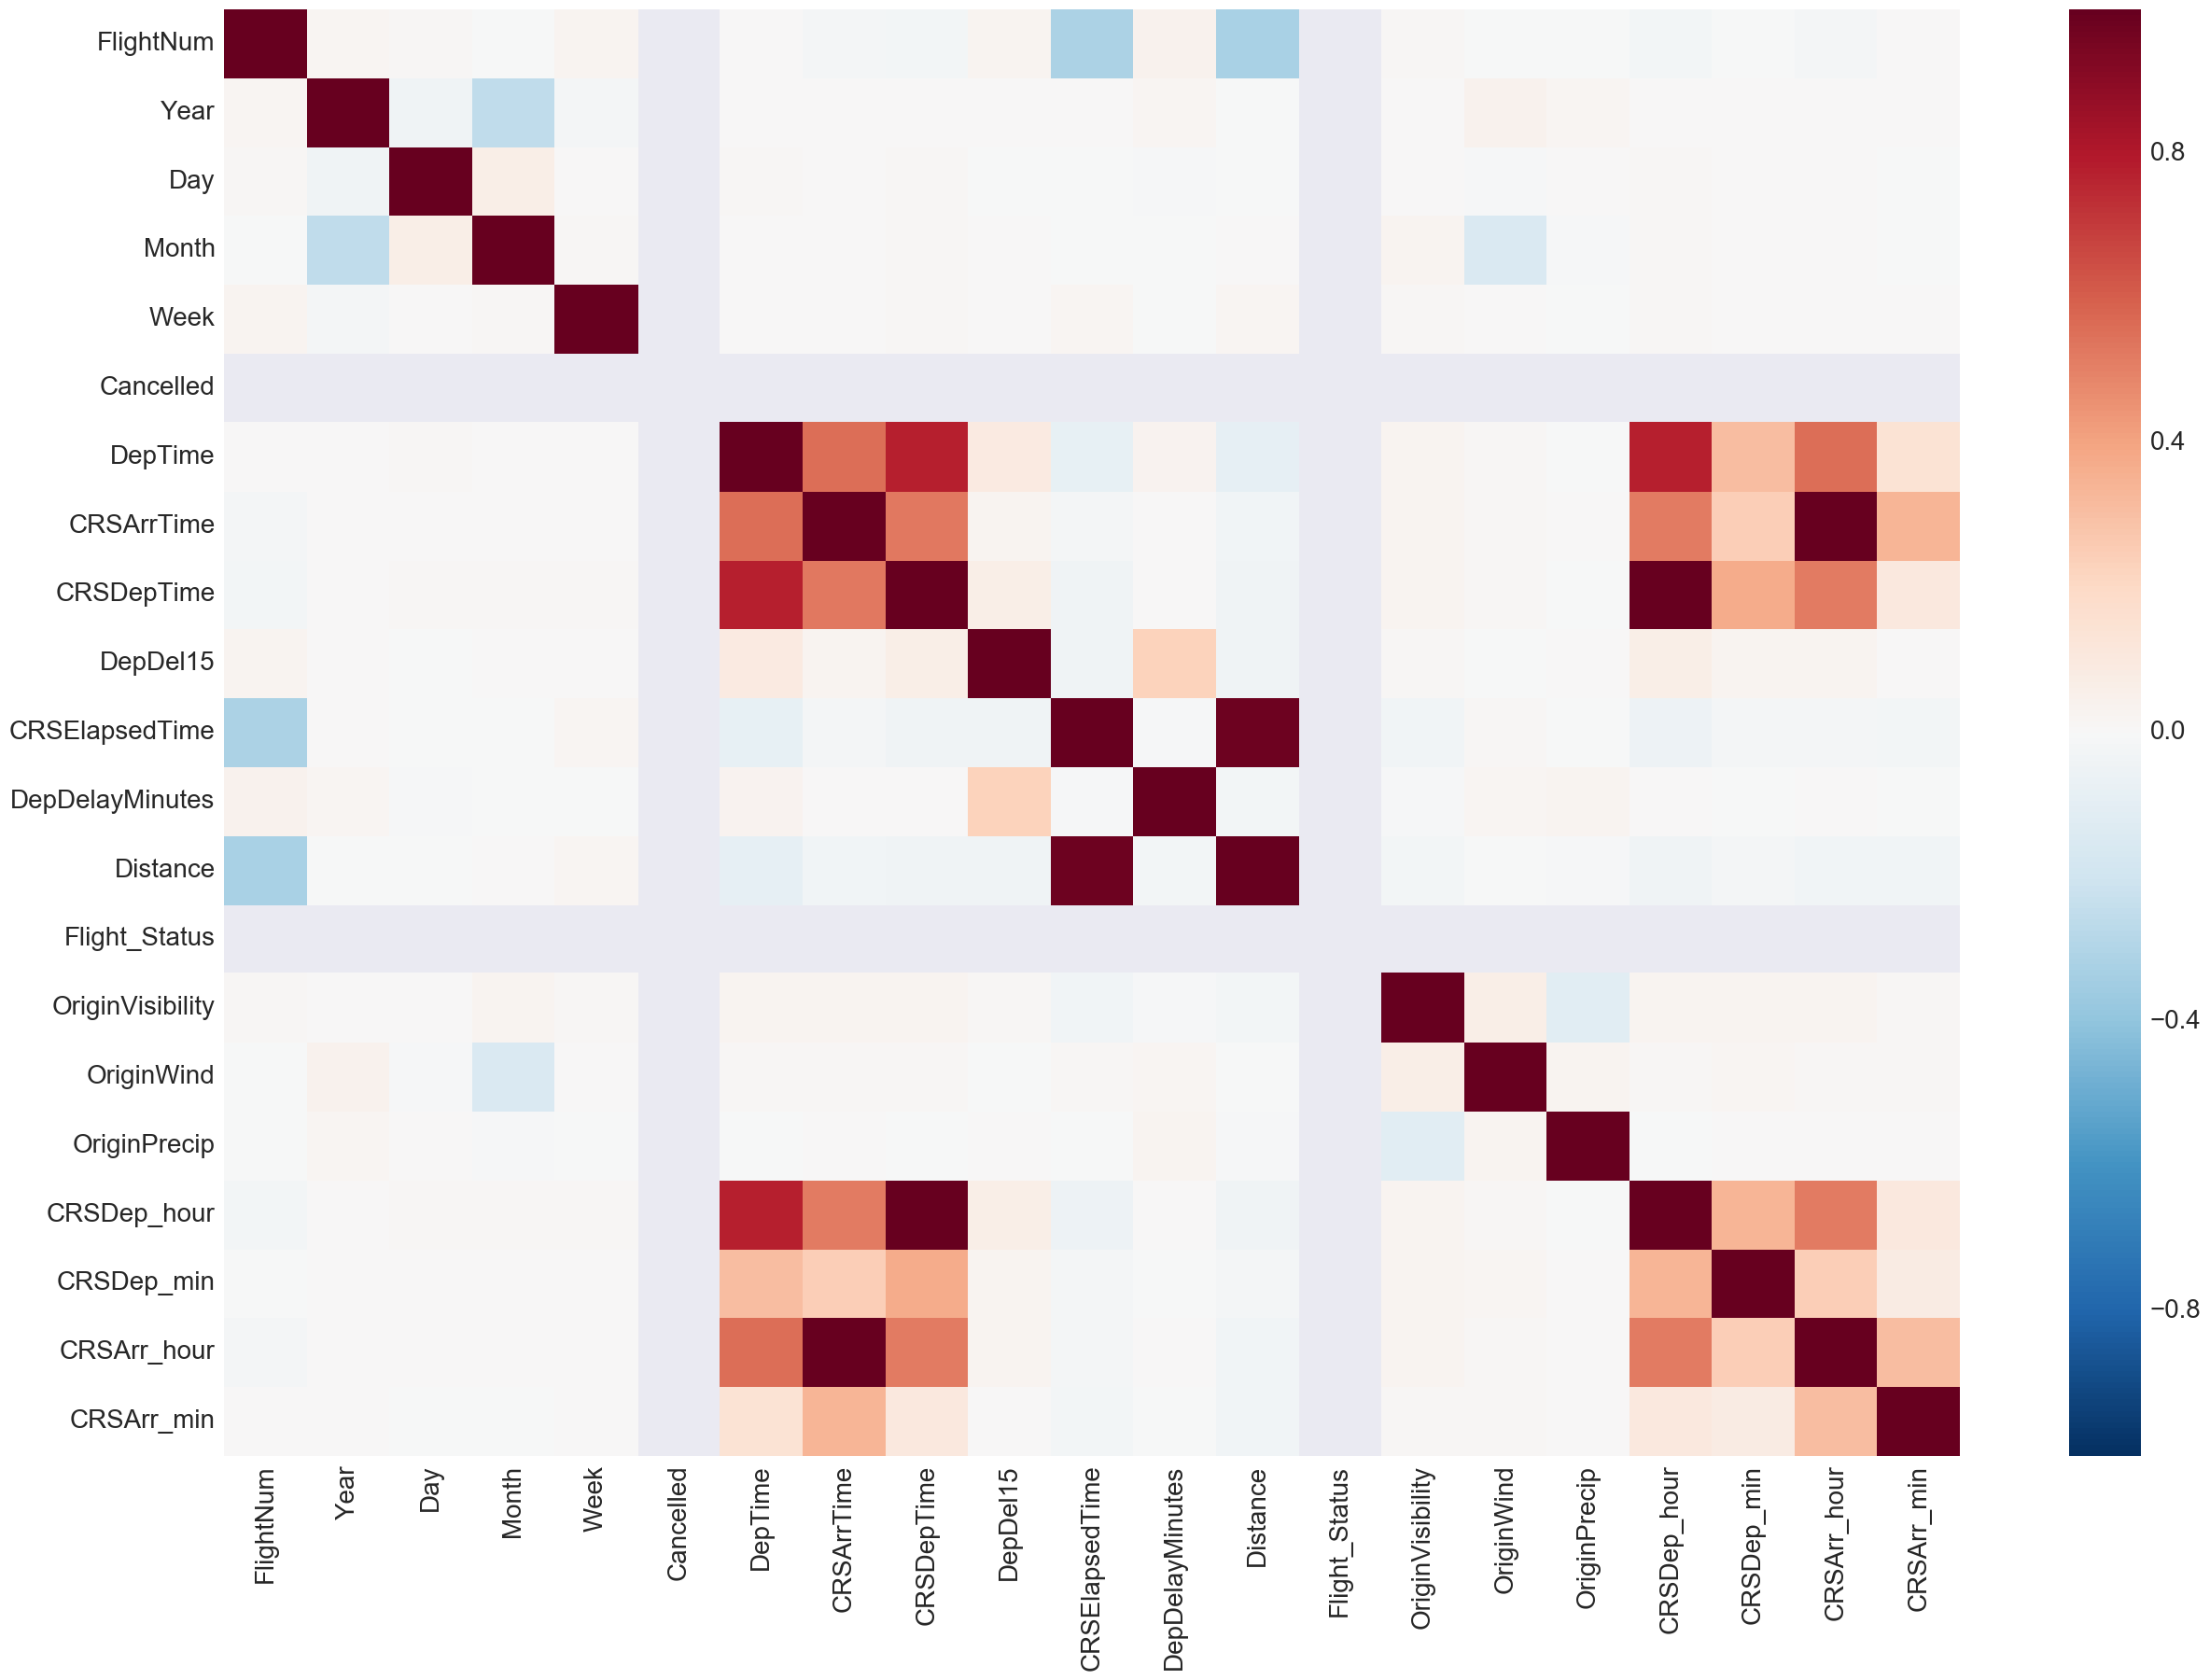

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

In [32]:
from sklearn.ensemble import RandomForestRegressor
model7 = RandomForestRegressor(n_estimators=125,max_depth=10)
model7.fit(X_train, y_train)

accuracy = model7.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = model7.predict(X_test)
y_train_predicted= model7.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

Accuracy:  0.186902423925
-----Train-----
RMS:  69.46883474224947
MAE:  41.5806538983
MAPE:  202.276724752
-----Test-----
RMS:  894.8802366719392
MAE:  842.35771729
MAPE:  4235.56774709


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model8 = RandomForestRegressor(n_estimators=125,max_depth=10)
model8.fit(X_train, y_train)

accuracy = model8.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = model8.predict(X_test)
y_train_predicted= model8.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)